# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhamad Syarif Fakhrezi
- Email: ms.fakhrezi@gmail.com
- Id Dicoding: muhamadsyarif

##Objective

* Mengidentifikasi berbagai faktor yang mempengaruhi tingginya attrition rate.
* Membuat business dashboard untuk membantu memonitori berbagai faktor tersebut.
* Membuat model machine learning untuk prediksi yang dideploy dengan streamlit.

## Persiapan

### Menyiapkan library yang dibutuhkan

In [19]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import pickle

### Menyiapkan data yang akan diguankan

## Data Understanding

In [20]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv')

In [21]:
employee_df = raw_df.copy()

pd.set_option('display.max_columns', None)
employee_df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


### Deskripsi Data

In [22]:
response = requests.get('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/README.md')

if response.status_code == 200:
    isi_file = response.text
    print(isi_file)
else:
    print("Failed to download file:", response.status_code)

# Employee Data

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeId** - Employee Identifier
* **Attrition** - Did the employee attrition? (0=no, 1=yes)
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Daily salary
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Hourly salary
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly salary
* **MonthlyRate** - Mounthly rate
* **NumCompaniesWorked** - Number of com

In [23]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

### Data Cleansing

In [24]:
employee_df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Terdapat nilai null pada kolom attrition, namun sementara kita abaikan dulu nilai null untuk melihat distribusi dan visualisasi data, setelah itu akan kita hapus nilai null sebelum dilakukan modeling.

In [25]:
employee_df.duplicated().sum()

0

### Feature Engineering

Kita akan lakukan encoding pada kolom Over Time dan Business Travel agar dapat dilakukan analisis korelasi.

In [26]:
# encode kolom OverTime

employee_df.replace({'OverTime': {'No': 0, 'Yes': 1},
                     'BusinessTravel': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}},
                    inplace=True)

In [27]:
employee_df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,1.086395,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,0.532170,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,0.000000,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,1.000000,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,1.000000,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1.000000,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [28]:
print('EmployeeCount Unique Value:', (employee_df.EmployeeCount.unique()))
print('Over18 Unique Value:', (employee_df.Over18.unique()))
print('StandardHours Unique Value:', (employee_df.StandardHours.unique()))

EmployeeCount Unique Value: [1]
Over18 Unique Value: ['Y']
StandardHours Unique Value: [80]


Kolom Over18, EmployeeCount, dan StandardHours hanya memiliki satu unique value/zero variance, sehingga tidak perlu dilakukan analisis, oleh karena itu akan kita hapus.

In [29]:
employee_df = employee_df.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis=1)

### EDA

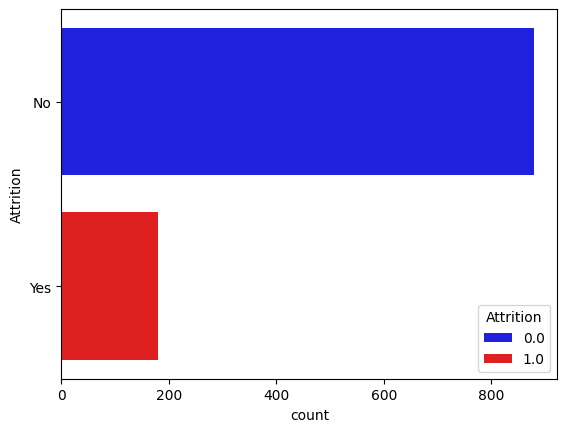

In [30]:
sns.countplot(data=raw_df, y='Attrition', hue='Attrition', palette=['Blue', 'Red'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

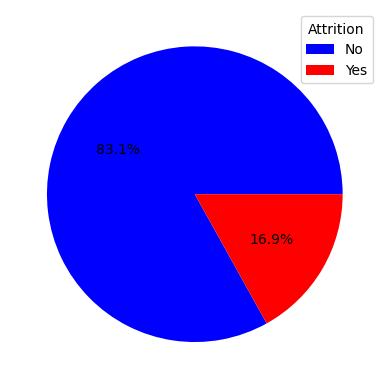

In [31]:
plt.pie(employee_df.groupby('Attrition').EmployeeId.nunique(), autopct='%.1f%%', colors=['Blue', 'Red'])
plt.legend(['No', 'Yes'], title='Attrition')
plt.show()

####Correlation

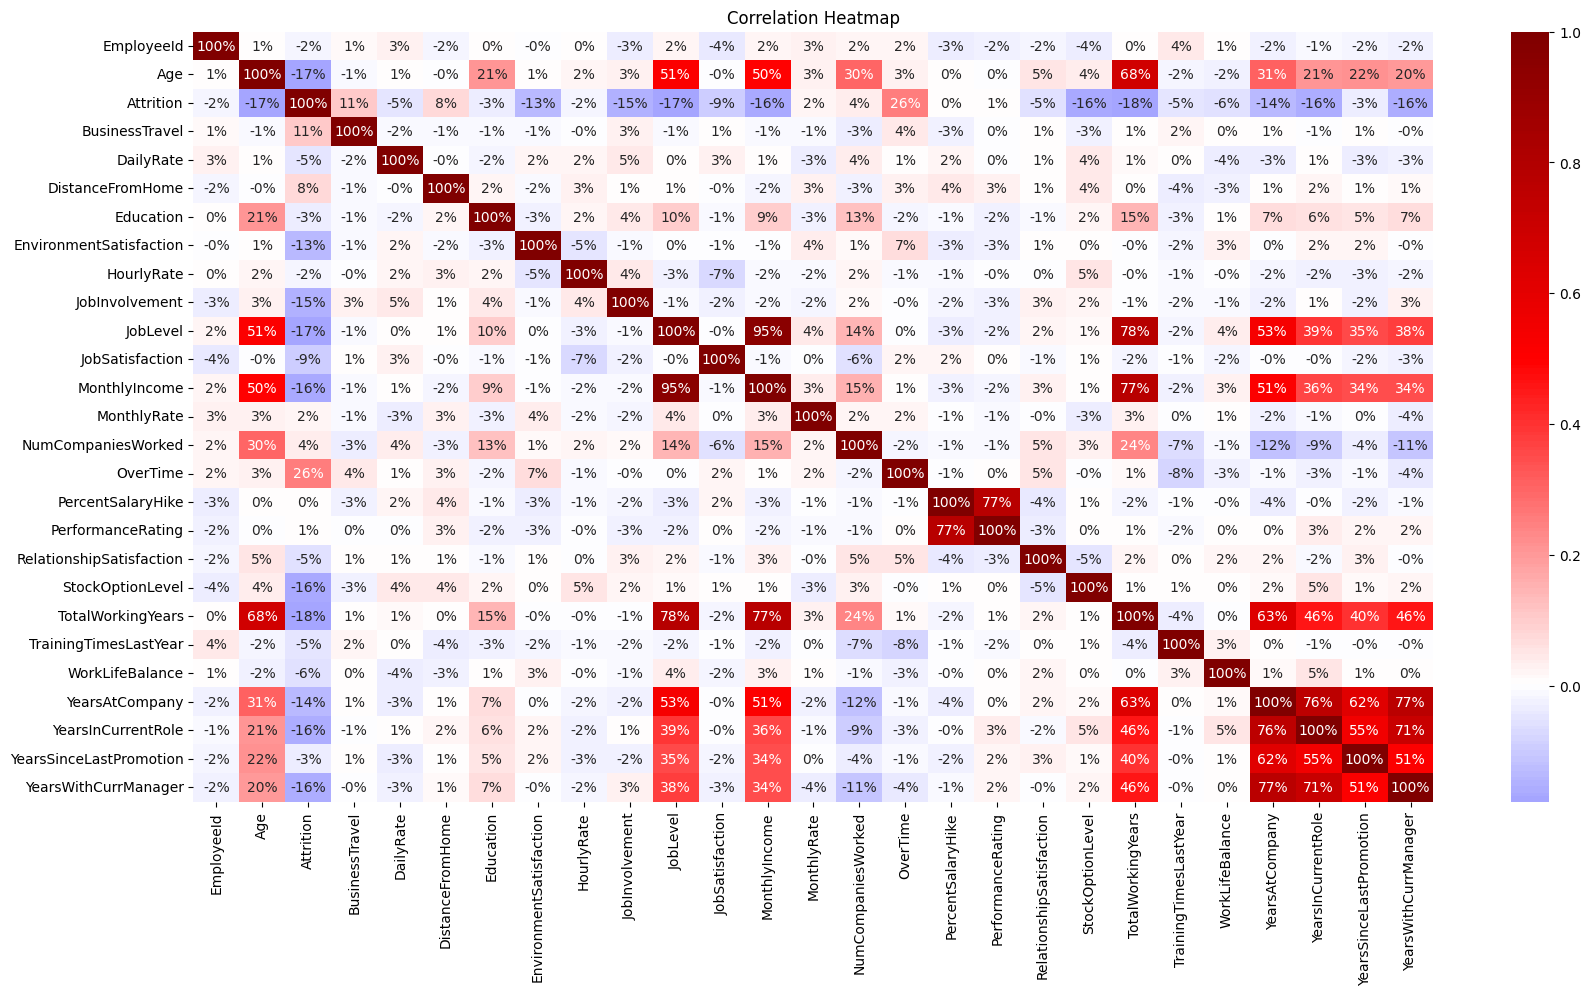

In [32]:
fig, axe = plt.subplots(figsize=(20,10))
correlation_matrix = employee_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', center=0, fmt=".0%")
plt.title("Correlation Heatmap")
plt.show()

Attrition memiliki nilai korelasi yang rendah terhadap featur-feature numerik, namun kita akan coba melihat distribusi data numerik yang memiliki nilai korelasi terhadap attrition paling tidak diatas 15% (absolut) dengan menggunakan grafik boxplot. Beberapa feature numerik yang digunakan: 'Age', 'JobLevel', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'. Namun sebelumnya kita akan menambahkan kolom baru yang berisi nilai decode dari kolom attrition untuk digunakan pada grafik boxplot.

#### Numerical Distribution

In [33]:
employee_df['Attr'] = employee_df['Attrition']
employee_df.replace({'Attr': {0 : 'No', 1 : 'Yes'}}, inplace=True)

In [34]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True, palette=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, hue=segment_feature, palette=palette, ax=ax[i], showfliers=showfliers)
            ax[i].set_title(feature)
            ax[i].set_xlabel(None)
            ax[i].set_ylabel('Attrition')
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

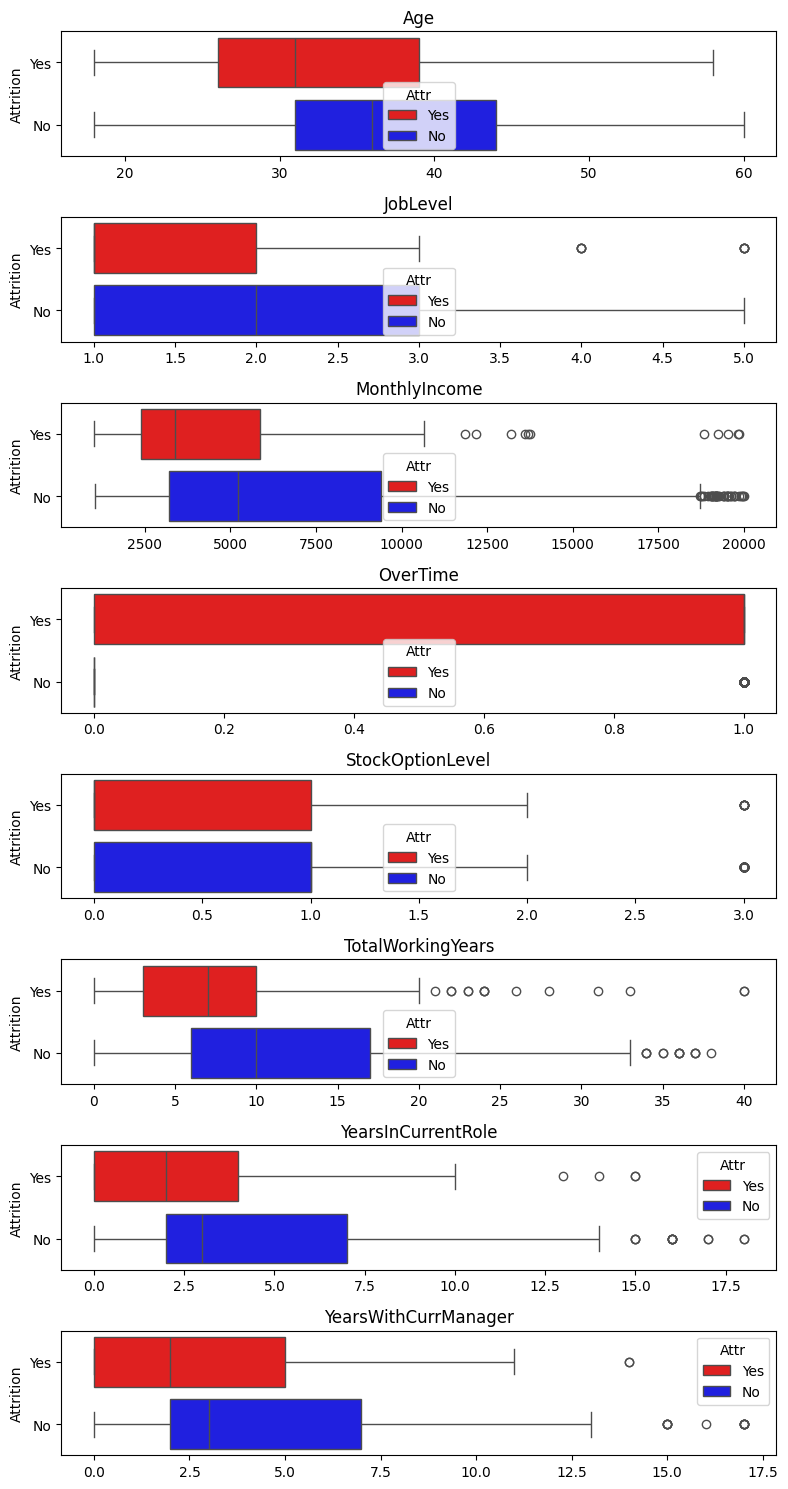

In [35]:
numerical = ['Age', 'JobLevel', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']
numerical_dis_plot(
    features=numerical,
    df=employee_df,
    segment_feature='Attr',
    palette=['Red', 'Blue']
)

Berdasarkan grafik heatmap yang diperkuat dengan garfik boxplot, karyawan yang mengalami Over Time memiliki cenderungan untuk resign/keluar dari pekerjaannya. Selain itu karyawan yang berumur muda, yang memiliki level pekerjaan yang rendah, yang memiliki pendapatan perbulan cenderung rendah, tingkat pilihan saham yang cenderung rendah, total tahun kerja yang relatif rendah, total tahun dalam peran pekerjaan saat ini yang relatif rendah, dan total tahun dengan manajer saat ini yang relatif rendah adalah karyawan yang lebih berpotensi untuk keluar dari pekerjaannya.

#### Categorical Distribution

Untuk data categorical, yang kita gunakan hanya data nominal saja, sedangkan data ordinal telah diencoding dan analisisnya digabungkan dengan data numerik.

<ipython-input-36-92787e013438>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')


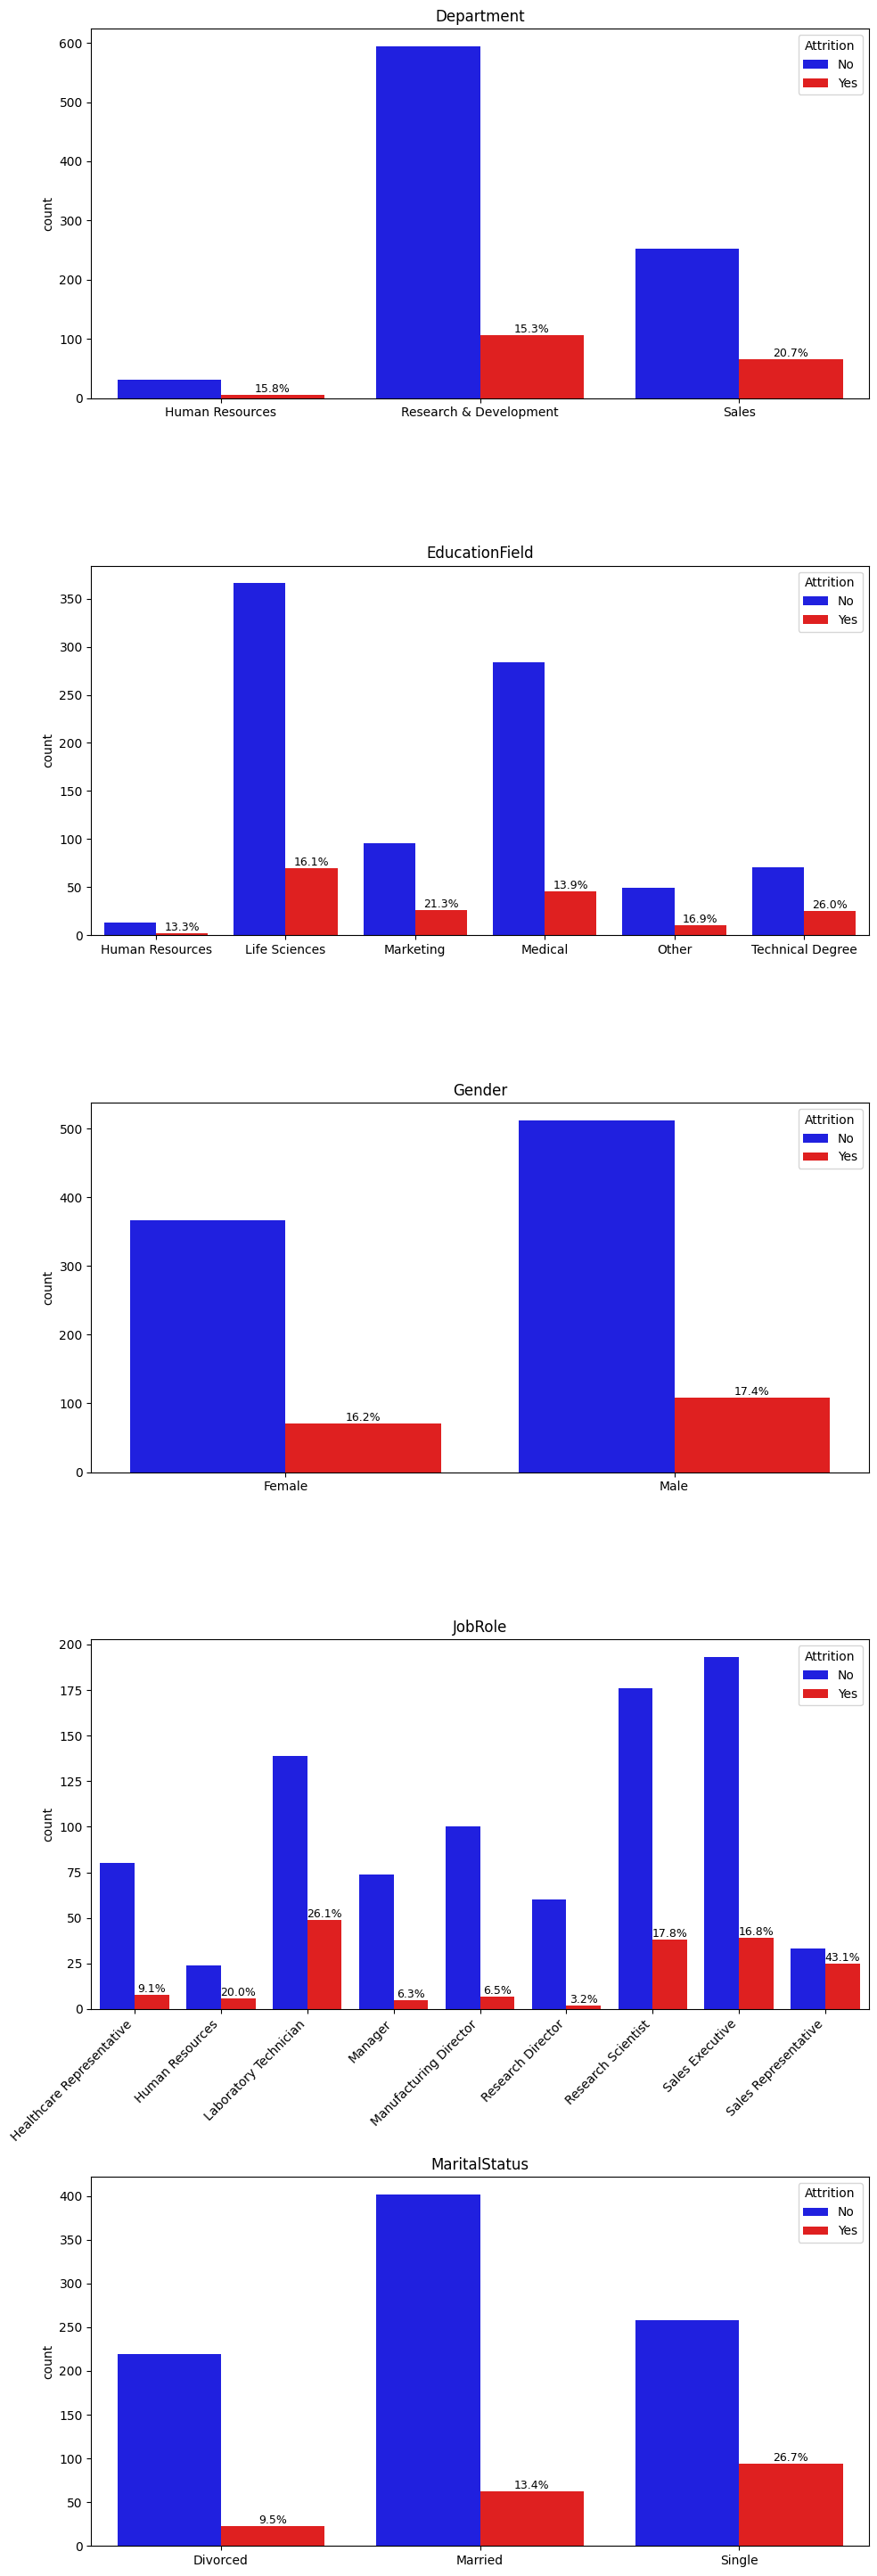

In [36]:
categorical = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

fig, ax = plt.subplots(len(categorical), 1, figsize=(10, 29))
for i, feature in enumerate(categorical):
  sns.countplot(data=employee_df.sort_values(by=feature, ascending=True), x=feature, hue='Attrition', palette=['Blue', 'Red'],ax=ax[i])
  ax[i].set_xlabel(None)
  ax[i].legend(labels=['No', 'Yes'], title='Attrition')
  ax[i].set_title(feature)

  total_counts = employee_df.groupby(feature)['Attrition'].count()
  attrition_counts = employee_df[employee_df['Attrition'] == 1].groupby(feature)['Attrition'].count()
  percentages = (attrition_counts / total_counts * 100)

  for j, p in enumerate(ax[i].patches):
    height = p.get_height()
    if height > 0:
      feature_index = j % len(percentages)
      hue_index = j // len(percentages)
      if hue_index == 1:
        ax[i].text(p.get_x() + p.get_width() / 2., height, f'{percentages.iloc[feature_index]:.1f}%', ha='center', va='bottom', size=9)

  if len(total_counts) > 7:
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

###Save Data for Dashboard Visualization

*Sebelum ke tahap modeling, kita akan menyimpan terlebih dahulu data yang telah dibersihkan dan akan digunakan untuk membuat dashboard visualisasi.*

In [37]:
employee_df = employee_df.drop('Attr', axis=1)

In [38]:
df = employee_df[['Attrition'] + numerical + categorical]
df['Employee_id'] = employee_df['EmployeeId']
df.replace({'Attrition': {0: 'No', 1: 'Yes'}, 'OverTime': {0: 'No', 1: 'Yes'}}, inplace=True)

df.head()

<ipython-input-38-782718bdbd49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Employee_id'] = employee_df['EmployeeId']
<ipython-input-38-782718bdbd49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Attrition': {0: 'No', 1: 'Yes'}, 'OverTime': {0: 'No', 1: 'Yes'}}, inplace=True)


,Attrition,Age,JobLevel,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,Department,EducationField,Gender,JobRole,MaritalStatus,Employee_id
0,NaN,38,1,2991,Yes,1,7,2,2,Human Resources,Other,Male,Human Resources,Married,1
1,Yes,37,2,4777,No,0,15,0,0,Research & Development,Medical,Female,Healthcare Representative,Married,2
2,Yes,51,1,2461,Yes,3,18,0,7,Research & Development,Life Sciences,Male,Research Scientist,Married,3
3,No,42,4,13525,No,1,23,4,8,Sales,Marketing,Female,Sales Executive,Married,4
4,NaN,40,1,2001,No,3,20,3,2,Research & Development,Medical,Female,Research Scientist,Married,5


In [39]:
# df.to_csv('Employee.csv', index=False)

## Data Preparation / Preprocessing

###Feature Engineering

Feature yang digunakan hanya numerical yang memiliki nilai korelasi(pada heatmap) lebih dari 15%(nilai absolute) dan feature categorical. Kolom diurutkan berdasarkan urutan input pada web app prediction streamlit.

In [40]:
main_df = employee_df[['Attrition', 'Gender', 'Age', 'EducationField', 'MaritalStatus',
                       'Department', 'JobRole', 'JobLevel', 'OverTime', 'YearsInCurrentRole',
                       'YearsWithCurrManager', 'TotalWorkingYears', 'MonthlyIncome', 'StockOptionLevel']]
main_df = main_df.dropna()
main_df.replace({'OverTime':{'Yes':1, 'No':0}}, inplace=True)

### Split data

In [41]:
X = main_df.drop('Attrition', axis=1)
y = main_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(846, 13) (212, 13)


## **Modeling**

###Membuat Pipeline

Karena data pada variabel 'categorical' bersifat nominal/tidak memiliki tingkatan ordinal, maka encoding yang digunakan adalah one_hot encoding menggunakan library category_encoders. Sedangkan scaler yang digunakan adalah Standard Scaler dan menggunakan model Random Forest Classifier.

In [42]:
encoder = BinaryEncoder()
scaler = StandardScaler()
model = RandomForestClassifier()

transformers = [
    ('encoder', encoder, categorical),
    ('scaler', scaler, numerical)
]
preprocessor = ColumnTransformer(transformers)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

###Train the model

In [43]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encoder', BinaryEncoder(),
                                                  ['Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole',
                                                   'MaritalStatus']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'JobLevel',
                                                   'MonthlyIncome', 'OverTime',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'YearsInCurrentRole',
                                                   'YearsWithCurrManager'])])),
                ('model', RandomForestClassifier())])

###Model Prediction

In [44]:
y_pred = pipeline.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0.])

## Evaluation

###Confusion Matrix

<Axes: >

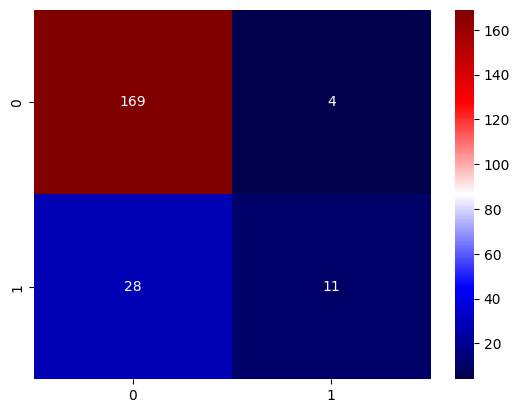

In [45]:
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='seismic')

###Accuracy

In [46]:
model_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', model_accuracy)

Accuracy of the model: 0.8490566037735849


###Classification Report

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       173
         1.0       0.73      0.28      0.41        39

    accuracy                           0.85       212
   macro avg       0.80      0.63      0.66       212
weighted avg       0.83      0.85      0.82       212



###Feature Extraction/Feature Importance Metrics in Random Forest

In [48]:
def feature_importances(pipeline):
  score_list = pipeline.named_steps['model'].feature_importances_
  feature_list = pipeline.named_steps['preprocessor'].get_feature_names_out()
  score_df = pd.DataFrame({'Feature': feature_list, 'Score': score_list})
  sns.barplot(x='Score', y='Feature', data=score_df.sort_values(by='Score', ascending=False).head(10), palette=('Blues_r'))
  plt.show()
  print('\n', score_df.sort_values(by='Score', ascending=False))

<ipython-input-48-16ad93647e70>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=score_df.sort_values(by='Score', ascending=False).head(10), palette=('Blues_r'))


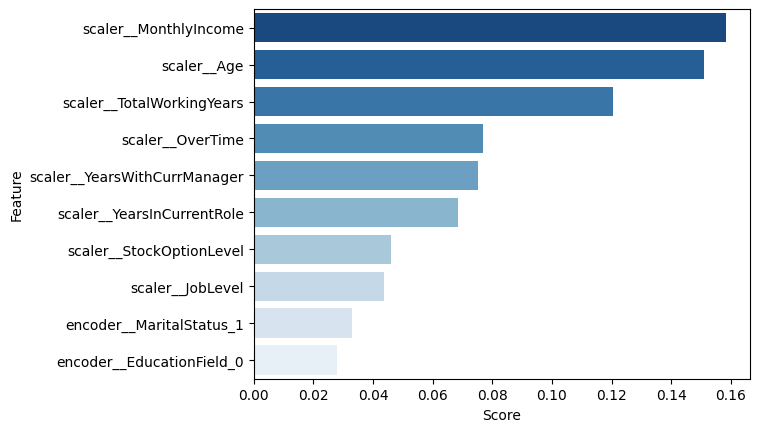


                          Feature     Score
15         scaler__MonthlyIncome  0.158435
13                   scaler__Age  0.151059
18     scaler__TotalWorkingYears  0.120449
16              scaler__OverTime  0.076817
20  scaler__YearsWithCurrManager  0.075113
19    scaler__YearsInCurrentRole  0.068586
17      scaler__StockOptionLevel  0.046086
14              scaler__JobLevel  0.043629
12      encoder__MaritalStatus_1  0.032837
2      encoder__EducationField_0  0.027895
10            encoder__JobRole_3  0.026312
3      encoder__EducationField_1  0.022723
4      encoder__EducationField_2  0.022479
6              encoder__Gender_1  0.021326
5              encoder__Gender_0  0.019908
11      encoder__MaritalStatus_0  0.016455
1          encoder__Department_1  0.016429
8             encoder__JobRole_1  0.014816
9             encoder__JobRole_2  0.014549
0          encoder__Department_0  0.012334
7             encoder__JobRole_0  0.011765


In [49]:
feature_importances(pipeline)

###K-Fold Cross Validation

In [50]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print('Cross Validation Scores:', cv_scores)
print('Average Cross Validation Scores:', cv_scores.mean())

Cross Validation Scores: [0.83529412 0.85798817 0.82840237 0.84023669 0.84615385]
Average Cross Validation Scores: 0.8416150365471632


###Hyper Parameter Tuning

In [51]:
parameters = {
    'model__n_estimators': [50, 100, 150, 200, 250],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None]
}

####Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_search = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         BinaryEncoder(),
                                                                         ['Department',
                                                                          'EducationField',
                                                                          'Gender',
                                                                          'JobRole',
                                                                          'MaritalStatus']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'JobLevel',
                                                                          'MonthlyIncome',
                                                                          'OverTime',
                                                                          'StockOptionLevel',
                                                                          'TotalWorkingYears',
                                                                          'YearsInCurrentRole',
                                                                          'YearsWithCurrManager'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 150, 200, 250]})

In [53]:
grid_search.best_params_

{'model__max_depth': None,
 'model__max_features': None,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 10,
 'model__n_estimators': 50}

#####Build New Model with Best Parameters

In [54]:
pipeline2 = grid_search.best_estimator_

model2 accuracy score: 0.8726415094339622


<Axes: >

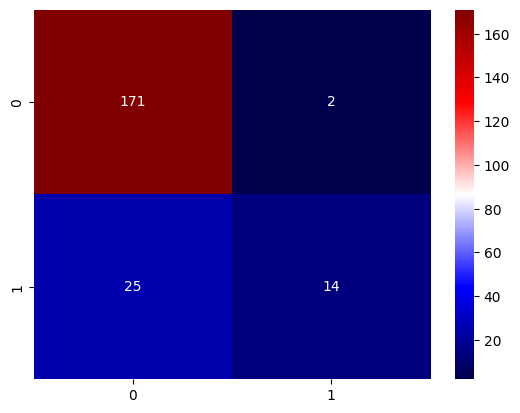

In [55]:
y_pred2 = pipeline2.predict(X_test)
print('model2 accuracy score:', accuracy_score(y_test, y_pred2))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='seismic')

#####K-Fold Cross Validation with New Parameters

In [56]:
cv_scores2 = cross_val_score(pipeline2, X_train, y_train, cv=5, scoring='accuracy')
print('Cross Validation Scores:', cv_scores2)
print('Average Cross Validation Scores:', cv_scores2.mean())

Cross Validation Scores: [0.85882353 0.85207101 0.83431953 0.84023669 0.85798817]
Average Cross Validation Scores: 0.8486877828054299


####Randomized Search

In [57]:
rnd_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameters, cv=5, random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('encoder',
                                                                               BinaryEncoder(),
                                                                               ['Department',
                                                                                'EducationField',
                                                                                'Gender',
                                                                                'JobRole',
                                                                                'MaritalStatus']),
                                                                              ('scaler',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'JobLevel',
                                                                                'MonthlyIncome',
                                                                                'OverTime',
                                                                                'StockOptionLevel',
                                                                                'TotalWorkingYears',
                                                                                'YearsInCurrentRole',
                                                                                'YearsWithCurrManager'])])),
                                             ('model',
                                              RandomForestClassifier())]),
                   param_distributions={'model__max_depth': [None, 10, 20, 30],
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [50, 100, 150,
                                                                200, 250]},
                   random_state=42)

In [58]:
rnd_search.best_params_

{'model__n_estimators': 200,
 'model__min_samples_split': 10,
 'model__min_samples_leaf': 2,
 'model__max_features': 'log2',
 'model__max_depth': None}

#####Build New Model with Best Parameters

In [59]:
pipeline3 = rnd_search.best_estimator_

model3 accuracy score: 0.8584905660377359


<Axes: >

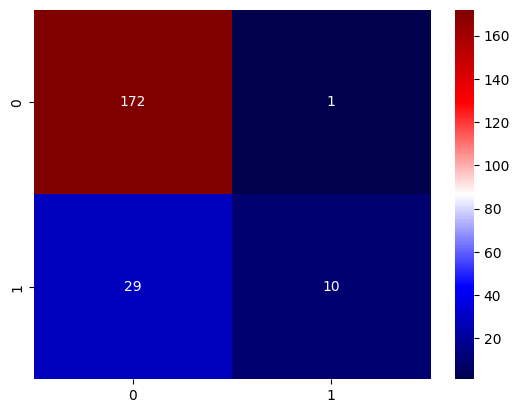

In [60]:
y_pred3 = pipeline3.predict(X_test)
print('model3 accuracy score:', accuracy_score(y_test, y_pred3))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='d', cmap='seismic')

#####K-Fold Cross Validation with New Parameters

In [61]:
cv_scores3 = cross_val_score(pipeline3, X_train, y_train, cv=5, scoring='accuracy')
print('Cross Validation Scores:', cv_scores3)
print('Average Cross Validation Scores:', cv_scores3.mean())

Cross Validation Scores: [0.82352941 0.86390533 0.84615385 0.84615385 0.85207101]
Average Cross Validation Scores: 0.8463626870866691


####Model with Best Average Cross Validation Score

In [62]:
model_scores = {'pipeline': cv_scores.mean(), 'pipeline2': cv_scores2.mean(), 'pipeline3': cv_scores3.mean()}
print('Best score:', max(model_scores, key=model_scores.get), '(', max(model_scores.values()), ')')

Best score: pipeline2 ( 0.8486877828054299 )


<ipython-input-48-16ad93647e70>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=score_df.sort_values(by='Score', ascending=False).head(10), palette=('Blues_r'))


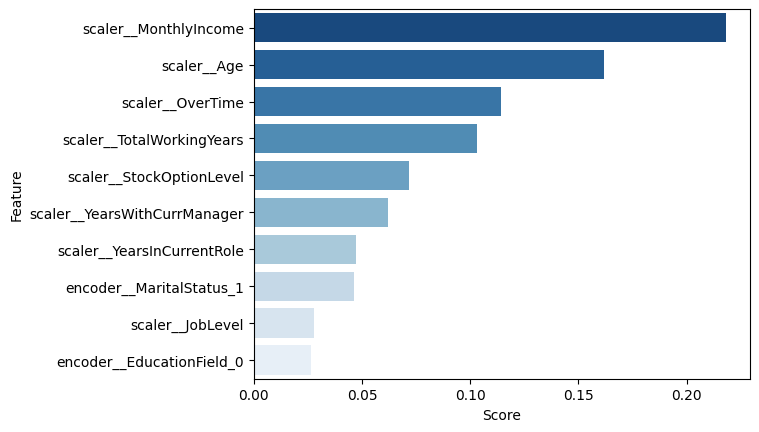


                          Feature     Score
15         scaler__MonthlyIncome  0.218224
13                   scaler__Age  0.161796
16              scaler__OverTime  0.114003
18     scaler__TotalWorkingYears  0.102920
17      scaler__StockOptionLevel  0.071652
20  scaler__YearsWithCurrManager  0.062004
19    scaler__YearsInCurrentRole  0.047201
12      encoder__MaritalStatus_1  0.046230
14              scaler__JobLevel  0.028051
2      encoder__EducationField_0  0.026559
3      encoder__EducationField_1  0.020262
10            encoder__JobRole_3  0.020233
4      encoder__EducationField_2  0.015206
1          encoder__Department_1  0.012135
6              encoder__Gender_1  0.011076
0          encoder__Department_0  0.008678
5              encoder__Gender_0  0.008339
11      encoder__MaritalStatus_0  0.007805
8             encoder__JobRole_1  0.006418
9             encoder__JobRole_2  0.006275
7             encoder__JobRole_0  0.004933


In [63]:
feature_importances(pipeline2)

> Berdasarkan heatmap/tingkat korelasi dan diperkuat dengan machine learning, dari semua feature yang terdapat pada dataset, beberapa feature yang memiliki pengaruh kuat dan akan digunakan untuk membuat dashboard adalah **Age, Monthly Income, Total Working Years, Over Time, dan JobLevel**. Selain itu data categorical kita gunakan untuk mendukung insight.



##Deployment

###Save Model

In [64]:
with open('pipeline.pkl', 'wb') as file:
  pickle.dump(pipeline2, file)

###Load Model

In [65]:
with open('pipeline.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

In [66]:
last_row = main_df.iloc[[-1]]
expect = last_row['Attrition'].iloc[0]
last_row = last_row.drop('Attrition', axis=1)
print('expectation:', expect)
last_row

expectation: 1.0


,Gender,Age,EducationField,MaritalStatus,Department,JobRole,JobLevel,OverTime,YearsInCurrentRole,YearsWithCurrManager,TotalWorkingYears,MonthlyIncome,StockOptionLevel
1469,Female,19,Technical Degree,Single,Sales,Sales Representative,1,0,0,0,1,2325,0


In [67]:
loaded_model.predict(last_row)

array([1.])

###Prediksi Null Attrition

**Kita akan gunakan data yang nilai attrition nya null untuk melakukan prediksi dengan model yang sudah dilatih.**

####Data Preprocessing

Sebelumnya kita lakukan tahap data preprocessing yang sama dengan model yang telah dilatih.

In [68]:
null_df = raw_df[['Attrition'] + numerical + categorical]
null_df = null_df[null_df['Attrition'].isnull()]
null_df.replace({'OverTime': {'No': 0, 'Yes': 1},
                 'BusinessTravel': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}},
                inplace=True)
null_df = null_df.drop(['Attrition'], axis=1)

null_df.head()

,Age,JobLevel,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,Department,EducationField,Gender,JobRole,MaritalStatus
0,38,1,2991,1,1,7,2,2,Human Resources,Other,Male,Human Resources,Married
4,40,1,2001,0,3,20,3,2,Research & Development,Medical,Female,Research Scientist,Married
5,29,1,2804,0,0,1,0,0,Human Resources,Medical,Male,Human Resources,Married
12,47,2,4591,1,1,11,4,2,Sales,Medical,Female,Sales Executive,Married
18,25,2,5206,0,2,7,7,7,Research & Development,Life Sciences,Male,Manufacturing Director,Divorced


####Prediction

In [69]:
null_pred = loaded_model.predict(null_df)
null_df['Attrition'] = null_pred
null_df.sample(5)

,Age,JobLevel,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,Department,EducationField,Gender,JobRole,MaritalStatus,Attrition
124,26,1,2867,0,0,8,7,6,Research & Development,Medical,Male,Laboratory Technician,Single,0.0
1293,43,2,5675,0,1,7,7,7,Sales,Life Sciences,Male,Sales Executive,Married,0.0
65,45,4,16704,0,0,21,6,6,Research & Development,Technical Degree,Female,Research Director,Single,0.0
1224,39,5,19431,0,0,21,0,3,Research & Development,Life Sciences,Male,Manager,Single,0.0
492,49,4,13966,1,1,30,11,12,Research & Development,Life Sciences,Female,Healthcare Representative,Married,0.0


In [70]:
df_filled = pd.concat([main_df, null_df]).reset_index()
df_filled = df_filled.drop('index', axis=1)
df_filled.head()

,Attrition,Gender,Age,EducationField,MaritalStatus,Department,JobRole,JobLevel,OverTime,YearsInCurrentRole,YearsWithCurrManager,TotalWorkingYears,MonthlyIncome,StockOptionLevel
0,1.0,Female,37,Medical,Married,Research & Development,Healthcare Representative,2,0,0,0,15,4777,0
1,1.0,Male,51,Life Sciences,Married,Research & Development,Research Scientist,1,1,0,7,18,2461,3
2,0.0,Female,42,Marketing,Married,Sales,Sales Executive,4,0,4,8,23,13525,1
3,0.0,Male,40,Medical,Married,Sales,Sales Executive,2,1,3,2,6,7457,3
4,1.0,Male,55,Medical,Married,Research & Development,Manager,5,1,2,4,24,19859,1


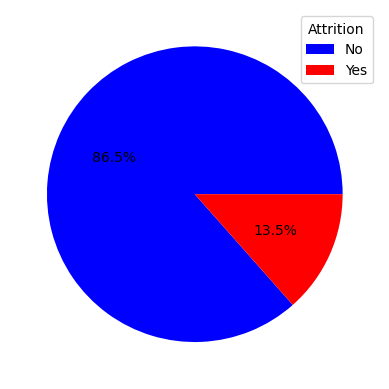

In [71]:
plt.pie(df_filled.groupby('Attrition').size(), autopct='%.1f%%', colors=['Blue', 'Red'])
plt.legend(['No', 'Yes'], title='Attrition')
plt.show()